# Part II - Effet des variables sur le taux annuel effectif global (TAEG) et sur le Un score de risque personnalisé construit à partir des données historiques de Prosper
## par Ousseynou Diop

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [29]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("prosperLoanData.csv")
#Liste comportant l'ensemble des variables
list_col=["LoanStatus" , "BorrowerRate", "StatedMonthlyIncome","Term","ProsperRating (Alpha)", "EmploymentStatus" , "LoanOriginalAmount","ProsperScore", "BorrowerAPR", "ListingCategory (numeric)","EmploymentStatusDuration" , "IsBorrowerHomeowner", "CurrentCreditLines","Occupation"]
#nouvelle dataframe
data_etudes= data[list_col]

In [30]:
#Conversion du type en categorie
list_a = ["HR" , "E" ,"D" ,"C" ,"B" , "A" ,"AA"]
cart_ordr = pd.api.types.CategoricalDtype(categories=list_a,ordered=True )
data_etudes["ProsperRating (Alpha)"].astype(cart_ordr)
# conversion du type de la variable EmploymentStatus en un type categoriel
ordre_list = ["Not available", "Not employed","Other","Retired" , "Part-time" ,"Full-time" , "Self-employed","Employed"]
category_list=pd.api.types.CategoricalDtype(ordre_list,ordered=True)
data_etudes.EmploymentStatus.astype(category_list)

0         Self-employed
1              Employed
2         Not available
3              Employed
4              Employed
              ...      
113932         Employed
113933         Employed
113934         Employed
113935        Full-time
113936         Employed
Name: EmploymentStatus, Length: 113937, dtype: category
Categories (8, object): ['Not available' < 'Not employed' < 'Other' < 'Retired' < 'Part-time' < 'Full-time' < 'Self-employed' < 'Employed']

In [31]:
#Suppression de valeurs StatedMonthlyIncome  plus grand que 30000
data_etudes = data_etudes.query('StatedMonthlyIncome <= 30000')
#masque pour la suppression des données avec un score de 11
data_etudes=data_etudes.query('ProsperScore!=11')

> Notez que les cellules ci-dessus ont été définies comme des diapositives de type "Skip". Cela signifie que
que lorsque le carnet de notes est rendu sous forme de diapositives http, ces cellules n'apparaîtront pas.

## Distribution du taux annuel effecti global(TAEG)

La distribution du taux annuel effectif global dans l'ensemble de donnée presente une tres large game de valeur allant d'environ 0 a 0.51 avec beaucoup de pic dont le plus haut est au environ de 0.35

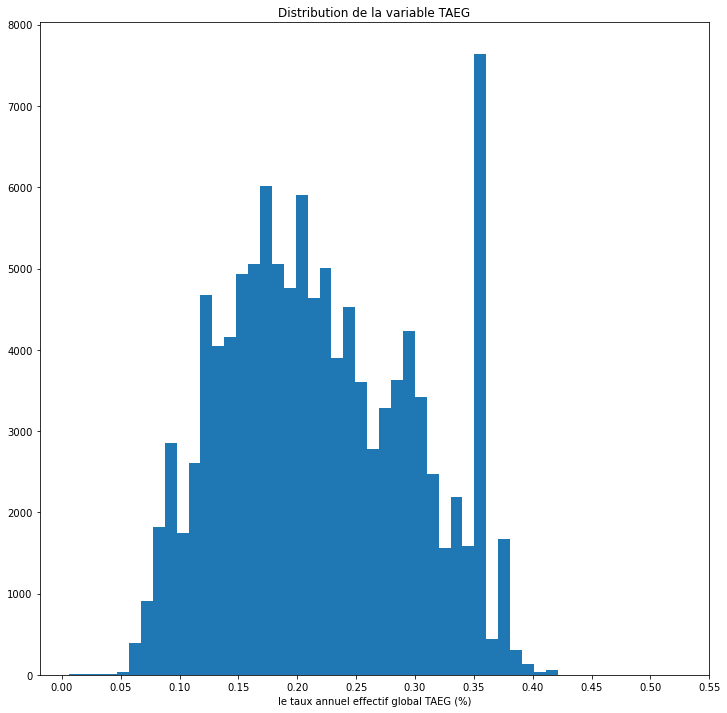

In [32]:
plt.figure(figsize=(12,12))
plt.hist(data=data_etudes,x='BorrowerAPR',bins=50)
plt.xticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55])
plt.xlabel("le taux annuel effectif global TAEG (%)")
plt.title("Distribution de la variable TAEG")
plt.show()

## Distribution du montant intiale du prets
Le montant initiale du pret est le montant du pret sans les taux elle ont une distribution asymetriques incliné vers la droite dont on a des valeurs trop grande a gauche .
avec des valeur qui peut aller jusqu'a 35000$

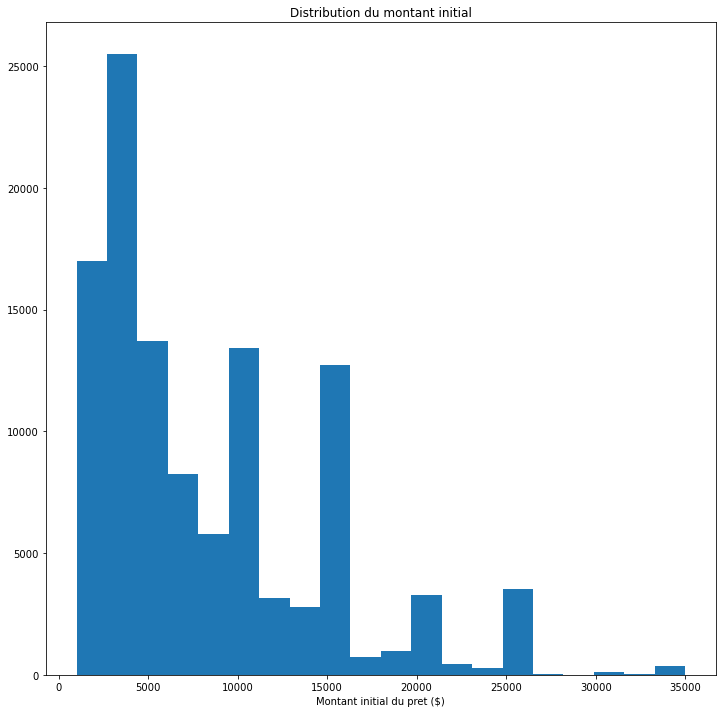

In [33]:
plt.figure(figsize=(12,12))
plt.hist(data=data_etudes,x='LoanOriginalAmount',bins=20)
plt.xlabel("Montant initial du pret ($)")
plt.title("Distribution du montant initial")
plt.show()

## Repartition de la durée des pret
La pluspart des demandeur de pret choisie entre 12 et 60mois pour rembouser leur pret. Et la plus part des personnes opte pour les 36 mois 


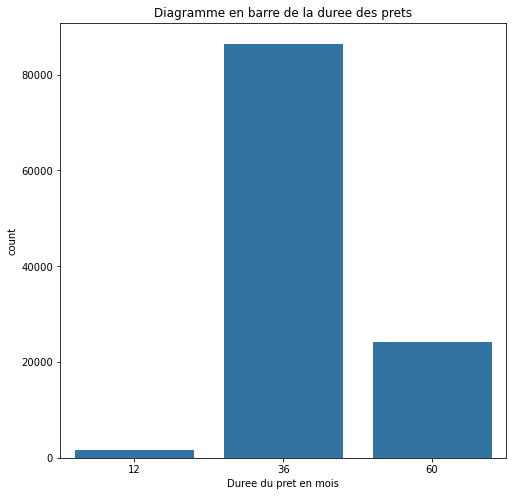

In [34]:
plt.figure(figsize=(8,8))
color=sns.color_palette()[0]
sns.countplot(data=data_etudes,x='Term',color=color)
plt.xlabel("Duree du pret en mois")
plt.title("Diagramme en barre de la duree des prets")
plt.show()

In [35]:
#Defintion d'une fonction pour le tracage
def diag_bar(col):
    plt.figure(figsize=(20,8))
    color = sns.color_palette()[0]
    #ordre=data_pret_etudes.col.value_counts().index.sort_values()
    sns.countplot(data=data_etudes,x=col,color=color)
    plt.xlabel(col)
    #plt.xticks(rotation=90)
    plt.title("distribution de " + col)

## Distribution ProsperRating (Alpha)
La banque attribue des score a chaque pret qui va de AA a HR et on voit que la classe C est la classe modale


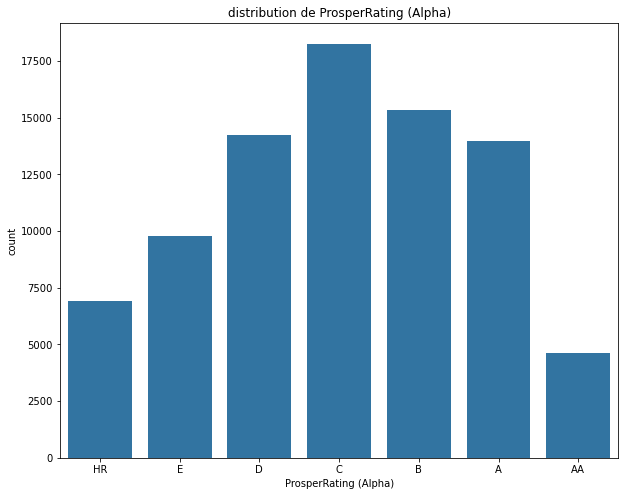

In [36]:
ordre=["HR" , "E" ,"D" ,"C" ,"B" , "A" ,"AA"]
plt.figure(figsize=(10,8))
color = sns.color_palette()[0]
#ordre=data_pret_etudes.col.value_counts().index.sort_values()
sns.countplot(data=data_etudes,x='ProsperRating (Alpha)',color=color,order=ordre)
plt.xlabel("ProsperRating (Alpha)")
    #plt.xticks(rotation=90)
plt.title("distribution de ProsperRating (Alpha)" )
plt.show()

## Diagramme en Barre du score Personnalisé
Pour le score personnalisé la banque les attribues en fonction de l'historique . 4 est la classe modale


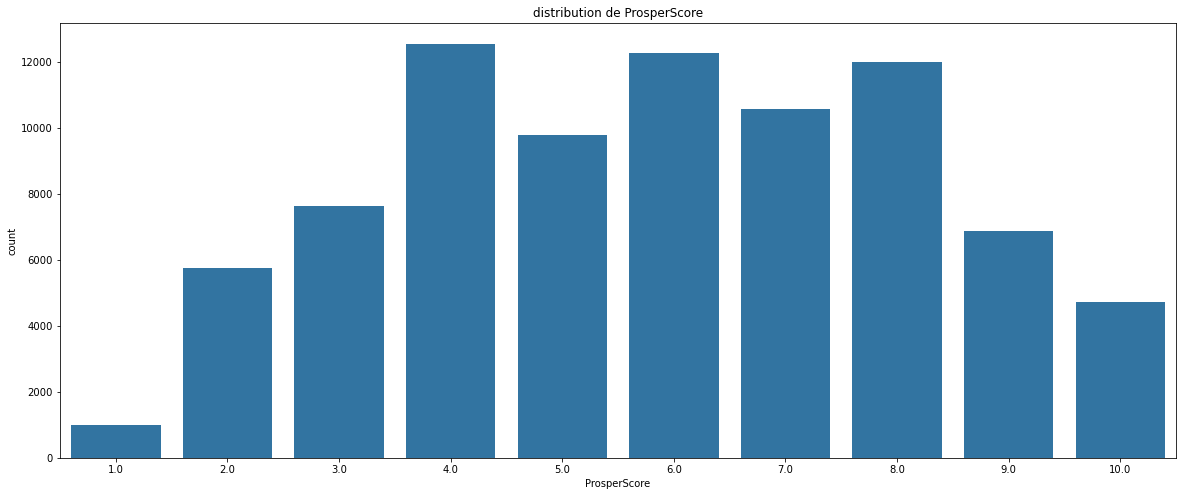

In [37]:
diag_bar('ProsperScore')

## Montant initial en fonction de la durée
Pour le montant initial du pret on a trouver que plus la durée augment on a des montant de pres plus eleve donc c'est deux variable on une correlation positive l'augmentation de l'un entraine l'augmentation de l'autre

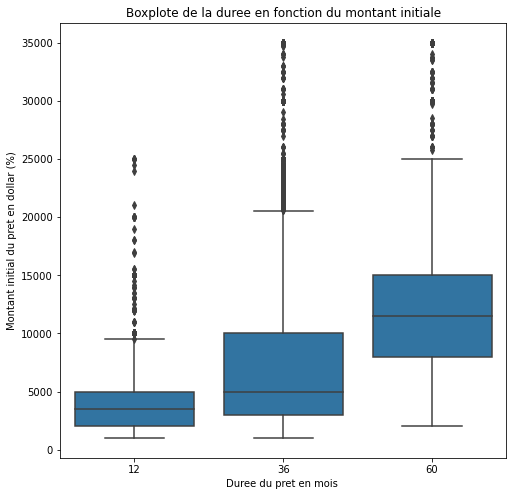

In [40]:
plt.figure(figsize=(8,8))
color=sns.color_palette()[0]
sns.boxplot(data=data_etudes,x='Term',y=data_etudes.LoanOriginalAmount,color=color)
plt.xlabel("Duree du pret en mois ")
plt.ylabel("Montant initial du pret en dollar (%)")
plt.title("Boxplote de la duree en fonction du montant initiale")
plt.show()

## TAEG en fonction du ProsperRating et de la duree pret
Les taux les plus faibles correspond au valeurs de ProsperRation de AA suivie de A et on vois que dans c'est deux modalités le taux augmente avec la durée donc la relation qu'on avait souligné en haut est confirmé par cette graphe 

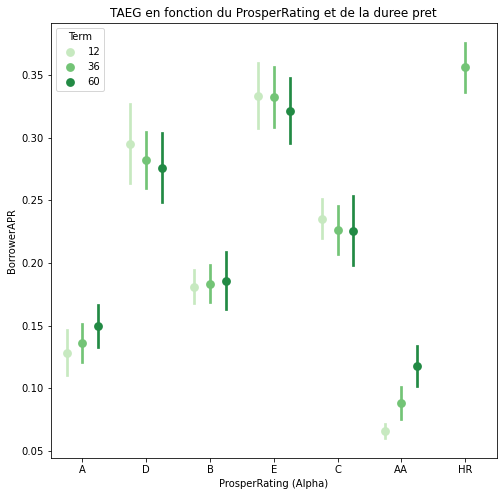

In [45]:
plt.figure(figsize=(8,8))
sns.pointplot(data=data_etudes,x='ProsperRating (Alpha)',y='BorrowerAPR',hue='Term',palette='Greens',linestyles='',dodge=0.5,ci='sd')
plt.title("TAEG en fonction du ProsperRating et de la duree pret")
plt.show()

## Distribution du TAEG en fonction du montant initiale

Les etudes on confirmé la correlation negatif entre ces deux variable plus le montant est elevé plus le taux est faible et vis versa 

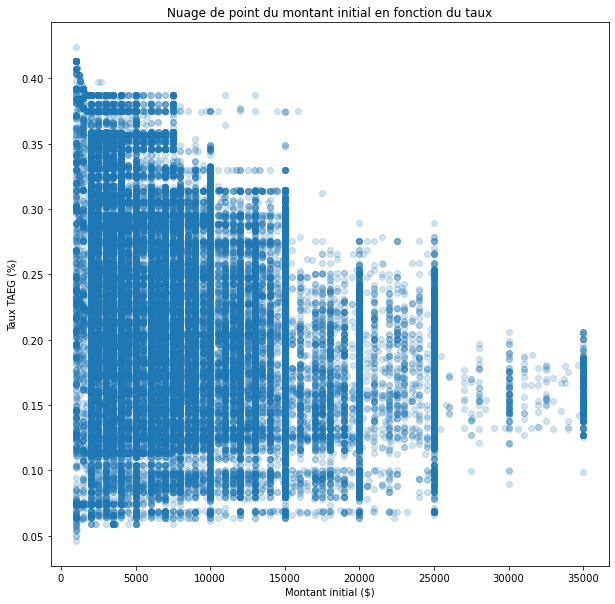

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(data=data_etudes.dropna(),y='BorrowerAPR',x='LoanOriginalAmount',alpha=0.2)
plt.xlabel('Montant initial ($)')
plt.ylabel('Taux TAEG (%)')
plt.title("Nuage de point du montant initial en fonction du taux")
plt.show()

In [43]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 956994 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
